In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [9]:
class AdalineGD(object):
    """ADAptive LInear NEoron classifier
    
    Parameters
    ----------
    
    eta : float
        Learning rate (between 0.0 and 1.0)
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
    
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [25]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100,4].values
y=np.where(y == 'Iris-setosa',-1, 1)
X = df.iloc[0:100, [0,2]].values

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,4))

In [13]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)

In [14]:
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adaline - Learning reate 0.01')

In [15]:
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)

In [16]:
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_),marker='o')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('log(sum-squared-error)')
ax[1].set_title('Adaline - Learning reate 0.0001')

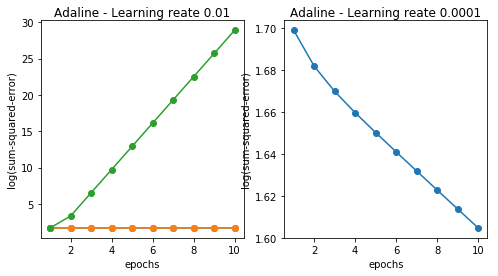

In [18]:
plt.show()

In [19]:
X_std = np.copy(X)


In [21]:
X_std[:,0]

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7])

In [22]:
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [23]:
X_std[:,0]

array([-0.5810659 , -0.89430898, -1.20755205, -1.36417359, -0.73768744,
       -0.11120129, -1.36417359, -0.73768744, -1.67741667, -0.89430898,
       -0.11120129, -1.05093052, -1.05093052, -1.8340382 ,  0.51528486,
        0.35866332, -0.11120129, -0.5810659 ,  0.35866332, -0.5810659 ,
       -0.11120129, -0.5810659 , -1.36417359, -0.5810659 , -1.05093052,
       -0.73768744, -0.73768744, -0.42444437, -0.42444437, -1.20755205,
       -1.05093052, -0.11120129, -0.42444437,  0.04542025, -0.89430898,
       -0.73768744,  0.04542025, -0.89430898, -1.67741667, -0.5810659 ,
       -0.73768744, -1.52079513, -1.67741667, -0.73768744, -0.5810659 ,
       -1.05093052, -0.5810659 , -1.36417359, -0.26782283, -0.73768744,
        2.39474331,  1.45501408,  2.23812177,  0.04542025,  1.61163562,
        0.35866332,  1.29839254, -0.89430898,  1.76825716, -0.42444437,
       -0.73768744,  0.6719064 ,  0.82852793,  0.98514947,  0.20204178,
        1.92487869,  0.20204178,  0.51528486,  1.14177101,  0.20

In [24]:
ada_std = AdalineGD(n_iter=15, eta=0.01).fit(X_std,y)

In [26]:
plot_decision_regions(X_std, y, classifier=ada_std)

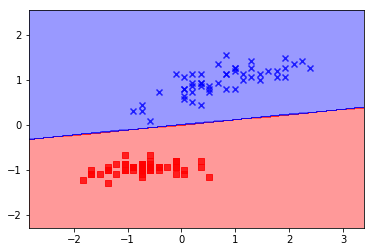

In [27]:
plt.show()

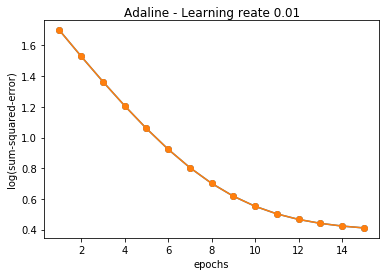

In [29]:
plt.plot(range(1, len(ada_std.cost_) + 1), np.log10(ada_std.cost_),marker='o')
plt.xlabel('epochs')
plt.ylabel('log(sum-squared-error)')
plt.title('Adaline - Learning reate 0.01')
plt.show()